# Chem 30324, Spring 2020, Homework 1 

# Due on January 22, 2020

## Problem 1: Discrete, probably

*In five card study, a poker player is dealt five cards from a standard deck of 52 cards.*

In [9]:
import numpy as np
from scipy import linalg          #contains certain operators you may need for class
import matplotlib.pyplot as plt   #contains everything you need to create plots
import sympy as sy
from scipy.integrate import quad

### 1. How many different 5-card hands are there?  (Remember, in poker the order in which the cards are received does *not* matter.)

In [10]:
import math
total=math.factorial(52)/math.factorial(52-5)/math.factorial(5)
print('Different 5-card hands =\t',total) # Pick 5 cards from 52 cards 5C52

Different 5-card hands =	 2598960.0


### 2. What is the probability of being dealt four of a kind (a card of the same rank from each suit)?

In [11]:
print('The probability of being dealt four of a kind =\t',round(13*(52-4)/total,9))
# First pick a kind (1C13), then one card from the remaining 48 cards (1C48)
# round() returns x rounded to n digits from the decimal point

The probability of being dealt four of a kind =	 0.000240096


### 3. What is the probability of being dealt a flush (five cards of the same suit)?

In [12]:
print('The probability of being dealt a flush =\t',round(4*math.factorial(13)/math.factorial(13-5)/math.factorial(5)/total,9))
#4 suites * 5C13 (Pick 5 cards from 13 cards)

The probability of being dealt a flush =	 0.001980792


## Problem 2: Continuous, probably

The probability distribution function for a random variable $x$ is given by 
$P(x)=x e^{-2x}, 0\le x < \infty$.

### 1. Is $P(x)$ normalized?  If not, normalize it.  Plot the normalized $P(x)$.

(0.24999999999999986, 4.600476137717771e-10)


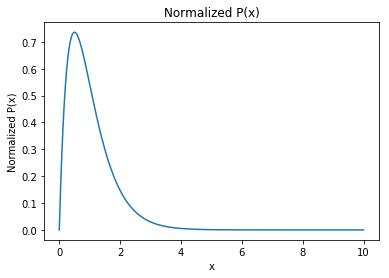

In [13]:
# First define a function that you want to integrate
def integrand(x):
    return x*math.exp(-2*x) #Return Probability distribution

I = quad(integrand,0,np.inf)
print(I)
# I has two values, the first value is the estimation of the integration, the second value is the upper bound on the error.
# Notice that the upper bound on the error is extremely small, this is a good estimation. 

X = np.linspace(0,10,1000)
Y=[]
for i in range(np.size(X)):
  x=X[i]
  y=integrand(x)/I[0]
  Y.append(y)

plt.plot(X,Y)
plt.xlabel('x');
plt.ylabel('Normalized P(x)');
plt.title('Normalized P(x)')
plt.show()

### 2. What is the most probable value of $x$?

In [14]:
X[np.argmax(Y)]

0.5005005005005005

### 3. What is the expectation value of $x$?

In [15]:
def integrand1(x):
    return x*integrand(x)/I[0] # Return nomalized probability distribution * v

I1 = quad(integrand1,0,np.inf)
print(I1)


(1.0000000000000007, 1.363303477330195e-10)


### 4. What is the variance of $x$?

In [16]:
def integrand2(x):
    return x*x*integrand(x)/I[0] # Return nomalized probability distribution * v^2

I2 = quad(integrand2,0,np.inf) 

var=I2[0]-I1[0]**2 # Variance can be calculated as <P(x)^2>-<P(x)>^2
print(var)

0.49999999999999933


## Problem 3: One rough night

It's late on a Friday night and people are stumbling up Notre Dame Ave. to their dorms. You observe one particularly impaired individual who is taking steps of equal length 1m to the north or south (i.e., in one dimension), with equal probability.

### 1. What is the furthest distance the person could travel after 20 steps?

In [17]:
n=20
print('The furthest distance the person could travel after 20 steps = \t',n)

The furthest distance the person could travel after 20 steps = 	 20


### 2. What is the probability that the person won't have traveled any net distance at all after 20 steps?

In [18]:
print('The probability that the person will not have traveled any net distance at all after 20 steps = \t',math.factorial(20)/math.factorial(10)/math.factorial(10)/2**20,) 
# Going nowhere - 10 steps south + 10 steps north 10C20
# Total 2^20 

The probability that the person will not have traveled any net distance at all after 20 steps = 	 0.17619705200195312


### 3. What is the probability that the person has traveled half the maximum distance after 20 steps?

In [19]:
print('The probability that the person has traveled half the maximun distance after 20 steps = \t',2*math.factorial(20)/math.factorial(5)/math.factorial(15)/2**20,)
# Going half the maximun distance - 15 steps south + 5 steps north or 15 steps north + 5 steps south
# Total 2_20

The probability that the person has traveled half the maximun distance after 20 steps = 	 0.029571533203125


### 4. Plot the probability of traveling a given distance vs distance. Does the probability distribution look familiar?  You'll see it again when we talk about diffusion.

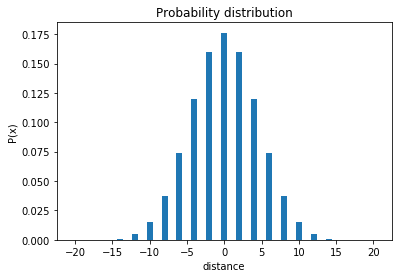

In [20]:
X=[]
Y=[]
for x in range(21): # x stps going south 
  y=math.factorial(20)/math.factorial(x)/math.factorial(20-x)/2**20  # Pick x steps from 20 steps xC20 / Total
  X.append(x-(20-x)) 
  # X means the final distance. The steps going south - the steps going north. If x=0, X=-20 ... If x=20, X=20. Postive means south
  Y.append(y)

plt.bar(X,Y)
plt.xlabel('distance');
plt.ylabel('P(x)');
plt.title('Probability distribution')
plt.show()

## Problem 4: Now this is what I call equilibrium

The Boltzmann distribution tells us that, at thermal equilibrium, the probability of a particle having an energy $E$ is proportional to $\exp(-E/k_\text{B}T)$, where $k_\text{B}$ is the Boltzmann constant.  Suppose a bunch of gas particles of mass $m$ are in thermal equilibrium at temperature $T$ and are traveling back and forth in one dimension with various velocities $v$ and kinetic energies $K=mv^2/2$.



### 1. What is the expectation value of the velocity $v$ of a particle?

$P = Ce^{-\frac{mv^2}{2k_B T}},-\infty\le v < \infty$.

$\int_{-\infty} ^{\infty} vCe^{-\frac{mv^2}{2k_B T}} dv = 0$

$V = \frac{\int_{0}^{\infty} vCe^{-\frac{mv^2}{2k_B T}} dv}{\int_{0}^{\infty} Ce^{-\frac{mv^2}{2k_B T}} dv} 
=0$


In [21]:
from sympy import *
v = Symbol('x')
C=Symbol('C',positive=True)
m=Symbol('m',positive=True)
kB=Symbol('kB',positive=True)
T=Symbol('T',positive=True)

#Next create a function
function = integrate(C*exp(-m*v**2/2/kB/T),(v,-oo,+oo)) #Denominator
function2 = integrate(v*C*exp(-m*v**2/2/kB/T)/function,(v,-oo,+oo)) #Numerator

print('The expectation value of velocity is',function2/function)

The expectation value of velocity is 0


### 2. What is the expectation value of the kinetic energy $K$ of a particle? How does your answer depend on the particle mass? On temperature?

$\int_{-\infty}^{\infty} Ce^{-\frac{mv^2}{2k_B T}} dv = C(\frac{2k_B T\pi}{m})^\frac{1}{2} $

$\int_{-\infty}^{\infty} \frac{mv^2}{2}Ce^{-\frac{mv^2}{2k_B T}} dv = \frac{Ck_B T}{2}(\frac{2k_B T\pi}{m})^\frac{1}{2} $

$K = \frac{\int_{-\infty}^{\infty} \frac{mv^2}{2}Ce^{-\frac{mv^2}{2k_B T}} dv}{\int_{-\infty}^{\infty} Ce^{-\frac{mv^2}{2k_B T}} dv} 
=\frac{k_B T}{2}$

K will increase when temperature increases(linear relationship), but unrelated to the particle mass.


Hint:

$\int_{0}^{\infty} e^{-ax^2} dx = \frac{1}{2}(\frac{pi}{a})^\frac{1}{2} $

$\int_{0}^{\infty} xe^{-ax^2} dx = \frac{1}{2a}$


$\int_{0}^{\infty} x^2e^{-ax^2} dx = \frac{1}{4a}(\frac{pi}{a})^\frac{1}{2} $

In [22]:
function3 = integrate(m*v**2/2*C*exp(-m*v**2/2/kB/T)/function,(v,-oo,+oo)) #Numerator
print('The expectation value of kinetic energy K is',function3)

The expectation value of kinetic energy K is T*kB/2
